#### 복습: 패널 데이터와 wide/long
- 패널 데이터
- wide_to_long

#### 질문: 추세 (trend/growth)
- 선 차트(line chart)
- 2016년부터 2019년까지 통신사 점유율/온라인 디지털 콘텐츠 사용자 수/스마트폰 제조사 점유율

#### 파이썬의 날짜/시간 자료형
- datetime 모듈의 datetime, date, timedelta
- 시계열 데이터 살펴보기

#### 질문: 관계 (relationship)
- 산점도(scatterplot)와 버블 차트(bubble chart)
- 관객수, 매출액, 스크린수, 상영횟수의 관계 살펴보기

In [1]:
from pandas import Series, DataFrame 
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

print('pandas', pd.__version__) 
print('matplotlib', matplotlib.__version__)
print('seaborn', sns.__version__) 

pandas 1.0.5
matplotlib 3.2.2
seaborn 0.10.1


In [2]:
import platform
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family = 'AppleGothic')
elif platform.system() == 'Windows': 
    path = 'c:\Windows\Fonts\malgun.ttf'
    font_name = font_manager.FontProperties(fname = path).get_name()
    rc('font', family = font_name)
elif platform.system() == "Linux":
    !apt -qq -y install fonts-nanum
    fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
    font = font_manager.FontProperties(fname=fontpath, size=9)
    rc('font', family='NanumBarunGothic') 
    font_manager._rebuild()
else:
    print("unknown system")

# 복습: 패널 데이터와 wide/long

### 패널
__동일한 개체(개인, 회사, 국가 등)를 시간에 따라 반복적__으로 조사한 데이터를 패널 데이터(panel data)라고 합니다. 개체가 반복되어 관찰되므로 시간의 흐름에 따른 변화를 짚어볼 수 있으며, 통계 분석에 있어서도 여러 이점을 제공합니다. 개체별로 데이터가 측정된 기간이 다른 경우를 불균형 패널(unbalanced panel)이라고 하며, 개체별로 데이터가 측정된 기간이 같은 경우를 균형 패널(balanced panel)이라고 합니다. 수업에서는 균형 패널을 구성하여 살펴보았습니다.

### long(가로형)-wide(세로형)
패널 데이터는 long(가로형)-wide(세로형) 두 가지 형태로 구성될 수 있습니다. 같은 개체가 여러 번 측정된 데이터를 각 시점에 따라 여러 변수로 길게 늘어놓은 것을 wide, 측정시점을 하나의 열로 가져와 하나의 변수가 여러 시점에 측정된 데이터를 가지고 있으면 long입니다.

<img src='https://github.com/eunyu1031/Media_interface_2020Spr/blob/master/pics/long_n_wide.PNG?raw=true'/>

Week7에서 2016~2019까지 4년치 데이터를 merge를 이용하여 식별자(pid)별로 맞추었고, 중복이 없다는 것을 확인하여 wide 형 데이터를 구성했습니다. Wide/long 등 어떤 데이터형이든 목적에 따라 사용하면 문제가 없으며, 필요한 경우 wide_to_long을 비롯한 pandas의 함수를 사용하여 데이터의 형태를 바꿀 수 있습니다.

merged.csv는 7주차 실습의 결과입니다. 또는 아래 링크에서 사용하시면 됩니다.
- https://raw.githubusercontent.com/eunyu1031/Media_interface_2020Spr/master/data/merged.csv

In [4]:
merged_wide = pd.read_csv("merged.csv", encoding = 'utf-8')
merged_wide.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7357 entries, 0 to 7356
Data columns (total 93 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   pid             7357 non-null   int64 
 1   hid2016         7357 non-null   int64 
 2   area_siz2016    7357 non-null   int64 
 3   gender2016      7357 non-null   int64 
 4   age_gr2016      7357 non-null   int64 
 5   age2016         7357 non-null   int64 
 6   mob_use2016     7357 non-null   int64 
 7   mob_num2016     7357 non-null   int64 
 8   mob_csp2016     7357 non-null   object
 9   mob_dev2016     7357 non-null   object
 10  c01_gr2016      7357 non-null   object
 11  c02_gr2016      7357 non-null   object
 12  c03_gr2016      7357 non-null   object
 13  c04_gr2016      7357 non-null   object
 14  c05_gr2016      7357 non-null   object
 15  sns_use2016     7357 non-null   int64 
 16  freq_sns12016   7357 non-null   object
 17  news_med12016   7357 non-null   object
 18  news_med

### wide_to_long

wide_to_long은 함수 이름 그대로 wide-form data를 long-form data로 바꾸어 주는 함수입니다. 해당 함수의 매개변수는 크게 __pd.wide_to_long(wide DataFrame, long으로 바꾼 후의 변수 이름들(stubname), 식별자로 사용할 열(i), 식별자가 반복되어 관찰된 값들을 구분하여 새로 index로 만들 이름(j),  j를 기존의 wide-form 열 이름에서 구분할 구분자(sep))__로 구성됩니다. DataFrame merged_wide는 변수의 이름과 연도를 구분하는 구분자가 따로 없어 기본값인 ''를 사용합니다. 

데이터의 구조를 바꾸는 함수는 wide_to_long 외에도 melt, stack&unstack. pivot_table 등이 있습니다. 필요한 경우에 찾아서 사용하시기 바랍니다.

In [5]:
merged_long = pd.wide_to_long(merged_wide, 
                             ['hid','area_siz',
                              'gender','age_gr','age',
                              'mob_use','mob_num','mob_csp','mob_dev',
                              'c01_gr','c02_gr','c03_gr','c04_gr','c05_gr',
                              'sns_use','freq_sns1',
                              'news_med1','news_med2','news_med3',
                              'news_plat1','news_plat2','news_plat3'], 
                             i = 'pid', 
                              j = 'year',
                              sep = "").sort_values(['pid', 'year'])

merged_long.head(10)

year2017  year2019  year2018  year2016  hid  area_siz  gender  \
pid   year                                                                  
10001 2016      2017      2019      2018      2016  100         1       1   
      2017      2017      2019      2018      2016  100         1       1   
      2018      2017      2019      2018      2016  100         1       1   
      2019      2017      2019      2018      2016  100         1       1   
10002 2016      2017      2019      2018      2016  100         1       2   
      2017      2017      2019      2018      2016  100         1       2   
      2018      2017      2019      2018      2016  100         1       2   
      2019      2017      2019      2018      2016  100         1       2   
20001 2016      2017      2019      2018      2016  200         1       1   
      2017      2017      2019      2018      2016  200         1       1   

            age_gr  age  mob_use  ... c04_gr c05_gr sns_use freq_sns1  \
pid   year                        ...                                   
10001 2016       5   49        1  ...                     1        16   
      2017       6   50        1  ...                     2             
      2018       6   51        1  ...                     1        16   
      2019       6   52        1  ...                     1        15   
10002 2016       5   44        1  ...                     1        16   
      2017       5   45        1  ...                     2             
      2018       5   46        1  ...      1      1       1        16   
      2019       5   47        1  ...      1              1        15   
20001 2016       6   51        1  ...                     2             
      2017       6   52        1  ...                     1        16   

           news_med1 news_med2 news_med3 news_plat1  news_plat2 news_plat3  
pid   year                                                                  
10001 2016         1         2                    1           3             
      2017         3                              3                         
      2018         3                              3                         
      2019         3         4                    3           2             
10002 2016                                                                  
      2017         3                              3                         
      2018                                                                  
      2019         3         4                    3           2             
20001 2016         2         3                    3           2             
      2017                                                                  

[10 rows x 26 columns]

# 질문: 추세 (trend/growth)

### wide/long

위에서 만든 merged_wide, merged_long 데이터를 사용해서 matplotlib/seaborn에서 선 차트를 그릴 예정입니다.

### 통신사 점유율 변화

mob_csp(p__a03008)는 스마트폰 가입 이동통신사를 나타내며, 범주형으로 코딩된 각 숫자의 의미는 다음과 같습니다.

1)SKT 2)KT(구 KTF) 3)LG U+ 4)알뜰폰서비스(MVNO) 

In [6]:
csp = merged_wide.loc[:, ['pid', 'mob_csp2016', 'mob_csp2017', 'mob_csp2018', 'mob_csp2019']].apply(lambda x: pd.to_numeric(x, errors = 'coerce'))
csp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7357 entries, 0 to 7356
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pid          7357 non-null   int64  
 1   mob_csp2016  5518 non-null   float64
 2   mob_csp2017  5821 non-null   float64
 3   mob_csp2018  6066 non-null   float64
 4   mob_csp2019  6226 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 287.5 KB


각 연도별로 통신사의 점유율을 계산하여 csp_share로 저장했습니다. 계속 wide-form 데이터입니다.

In [7]:
csp_share = csp.iloc[:, 1:].apply(lambda x: x.value_counts(normalize = True))
csp_share

,mob_csp2016,mob_csp2017,mob_csp2018,mob_csp2019
1.0,0.522834,0.487889,0.478899,0.486990
2.0,0.245198,0.273493,0.278107,0.268551
3.0,0.217108,0.228998,0.233103,0.233858
4.0,0.014860,0.009620,0.009891,0.010601


In [8]:
csp_share.index = ['SKT', 'KT', 'LG U+', 'MVNO']
csp_share

,mob_csp2016,mob_csp2017,mob_csp2018,mob_csp2019
SKT,0.522834,0.487889,0.478899,0.486990
KT,0.245198,0.273493,0.278107,0.268551
LG U+,0.217108,0.228998,0.233103,0.233858
MVNO,0.014860,0.009620,0.009891,0.010601


Matplotlib에서 선그래프는 ax.plot으로 간단하게 그릴 수 있습니다. 모양은 color, market, linestyle 등으로 바꿀 수 있습니다. 

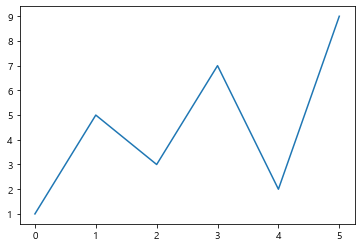

In [9]:
# default >>plot(y)
fig, ax = plt.subplots()
ax.plot([1, 5, 3, 7, 2, 9])

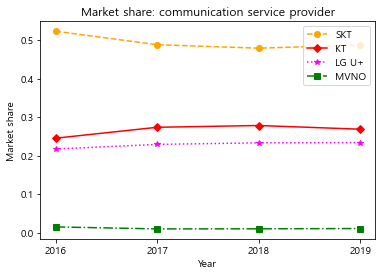

In [10]:
# Matplotlib, wide

fig, ax = plt.subplots()

ax.plot(csp_share.loc['SKT', :], color = 'orange', marker = 'o', linestyle = '--')
ax.plot(csp_share.loc['KT', :], color = 'red', marker = 'D', linestyle = '-')
ax.plot(csp_share.loc['LG U+', :], color = 'magenta', marker = '*', linestyle = ':')
ax.plot(csp_share.loc['MVNO', :], color = 'green', marker = 's', linestyle = '-.')

ax.set(title = 'Market share: communication service provider', 
       xlabel = 'Year',
      ylabel = 'Market share')

ax.set_xticklabels([2016, 2017, 2018, 2019])
ax.legend(csp_share.index, loc = 'upper right')
plt.show()

Matplotlib에서 제공하는 marker와 linestyle은 아래를 참고하시기 바랍니다.

Markers: https://matplotlib.org/3.2.1/api/markers_api.html
<img src='https://matplotlib.org/3.1.0/_images/sphx_glr_marker_reference_001.png'/>
<img src='https://matplotlib.org/3.1.0/_images/sphx_glr_marker_reference_002.png'/>

Line-style reference: https://matplotlib.org/gallery/lines_bars_and_markers/line_styles_reference.html
<img src='https://matplotlib.org/_images/sphx_glr_line_styles_reference_001.png'/>

범례(legend)의 위치는 매개변수 'loc'으로 정하며 기본이 'best'이지만, 위치를 따로 지정할 수 있습니다.
<table border="1" class="docutils align-default">
<colgroup>
<col width="54%" />
<col width="46%" />
</colgroup>
<thead valign="bottom">
<tr class="row-odd"><th class="head">Location String</th>
<th class="head">Location Code</th>
</tr>
</thead>
<tbody valign="top">
<tr class="row-even"><td>'best'</td>
<td>0</td>
</tr>
<tr class="row-odd"><td>'upper right'</td>
<td>1</td>
</tr>
<tr class="row-even"><td>'upper left'</td>
<td>2</td>
</tr>
<tr class="row-odd"><td>'lower left'</td>
<td>3</td>
</tr>
<tr class="row-even"><td>'lower right'</td>
<td>4</td>
</tr>
<tr class="row-odd"><td>'right'</td>
<td>5</td>
</tr>
<tr class="row-even"><td>'center left'</td>
<td>6</td>
</tr>
<tr class="row-odd"><td>'center right'</td>
<td>7</td>
</tr>
<tr class="row-even"><td>'lower center'</td>
<td>8</td>
</tr>
<tr class="row-odd"><td>'upper center'</td>
<td>9</td>
</tr>
<tr class="row-even"><td>'center'</td>
<td>10</td>
</tr>
</tbody>
</table>

<p style="color:#0000FF";><font size = "5"><b>
 # 연습하기
    </b></font></p>
    
### 온라인 디지털 콘텐츠 사용자 
DataFrame 'content_count'는 2016-2019 각 온라인 디지털 콘텐츠 사용자의 수의 데이터입니다.
- 2016-2019 온라인 디지털 콘텐츠 사용자의 증감을 선 차트로 나타내세요.

In [11]:
content = merged_long.loc[:, ['c01_gr', 'c02_gr', 'c03_gr', 'c04_gr', 'c05_gr']].apply(lambda x: pd.to_numeric(x, errors = 'coerce')).reset_index()
content.head(10)

,pid,year,c01_gr,c02_gr,c03_gr,c04_gr,c05_gr
0,10001,2016,NaN,NaN,NaN,NaN,NaN
1,10001,2017,NaN,NaN,NaN,NaN,NaN
2,10001,2018,NaN,NaN,NaN,NaN,NaN
3,10001,2019,NaN,NaN,1.0,NaN,NaN
4,10002,2016,NaN,NaN,NaN,NaN,NaN
5,10002,2017,NaN,NaN,NaN,NaN,NaN
6,10002,2018,1.0,NaN,NaN,1.0,1.0
7,10002,2019,NaN,NaN,1.0,1.0,NaN
8,20001,2016,NaN,NaN,NaN,NaN,NaN
9,20001,2017,NaN,NaN,NaN,NaN,NaN


In [12]:
content_count = content.groupby('year').count()
content_count

,pid,c01_gr,c02_gr,c03_gr,c04_gr,c05_gr
year,,,,,,
2016,7357,81,99,192,445,230
2017,7357,202,226,214,509,270
2018,7357,1180,1175,615,1387,1166
2019,7357,1138,1271,752,1157,991


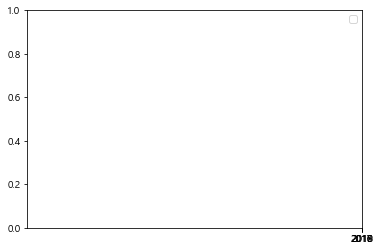

In [13]:
# Matplotlib, long
fig, ax = plt.subplots()





ax.set_xticks([2016, 2017, 2018, 2019])
ax.legend(['신문/잡지/책', '동영상/영화', 'TV프로그램', '음악', '게임'])

Seaborn에서는 sns.lineplot으로 그릴 수 있습니다. 하지만 그 전에 설명을 살펴보면, 해당 함수에서는 long-form data를 요구합니다. 따라서 2016-2019 통신사 점유율 데이터를 가지고 있는 DataFrame csp_share를 wide form에서 long form으로 바꾸어 봅시다.

In [ ]:
help(sns.lineplot)

wide_to_long에서 i는 DataFrame의 열(column)을 지정하는 것이므로 reset_index로 index를 열로 뺀 후 wide_to_long의 인수로 지정합니다.

In [15]:
csp_share

,mob_csp2016,mob_csp2017,mob_csp2018,mob_csp2019
SKT,0.522834,0.487889,0.478899,0.486990
KT,0.245198,0.273493,0.278107,0.268551
LG U+,0.217108,0.228998,0.233103,0.233858
MVNO,0.014860,0.009620,0.009891,0.010601


In [16]:
csp_share.reset_index()

,index,mob_csp2016,mob_csp2017,mob_csp2018,mob_csp2019
0,SKT,0.522834,0.487889,0.478899,0.486990
1,KT,0.245198,0.273493,0.278107,0.268551
2,LG U+,0.217108,0.228998,0.233103,0.233858
3,MVNO,0.014860,0.009620,0.009891,0.010601


Long-form에서 mob_csp 변수 하나만 남고(mob_csp), 연도별 데이터를 구분하는 식별자가 통신사의 이름이며(index), 각 열의 이름 뒤에 붙은 2016~2019가 연도이기 때문에(year) 아래와 같이 wide_to_long 함수를 사용하게 됩니다.

In [17]:
csp_share_long = pd.wide_to_long(csp_share.reset_index(), 
                                 ['mob_csp'],
                                 i = 'index',
                                j = 'year',
                                sep = "")
csp_share_long

,,mob_csp
index,year,
SKT,2016,0.522834
KT,2016,0.245198
LG U+,2016,0.217108
MVNO,2016,0.014860
SKT,2017,0.487889
KT,2017,0.273493
LG U+,2017,0.228998
MVNO,2017,0.009620
SKT,2018,0.478899


Seaborn의 lineplot에서는 다른 seaborn 그래프와 마찬가지로 x, y, hue에 열의 이름을 받기 때문에,  DataFrame.reset_index()로 통신사의 이름과 연도를 밖으로 빼 줍니다.

In [18]:
csp_share_long.reset_index()

,index,year,mob_csp
0,SKT,2016,0.522834
1,KT,2016,0.245198
2,LG U+,2016,0.217108
3,MVNO,2016,0.014860
4,SKT,2017,0.487889
5,KT,2017,0.273493
6,LG U+,2017,0.228998
7,MVNO,2017,0.009620
8,SKT,2018,0.478899
9,KT,2018,0.278107


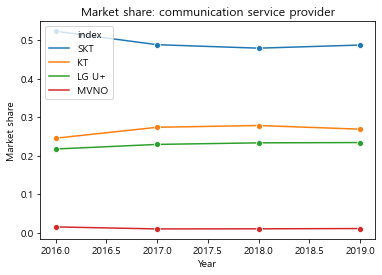

In [19]:
# Seaborn, long
fig, ax = plt.subplots()

sns.lineplot(x = 'year', 
             y = 'mob_csp', 
             hue = 'index', 
             data = csp_share_long.reset_index(),
            marker = 'o')

ax.set(title = 'Market share: communication service provider', 
       xlabel = 'Year',
      ylabel = 'Market share')

ax.legend(loc = 'upper left')
# ax.set_xticks([2016, 2017, 2018, 2019])
plt.show()

<p style="color:#0000FF";><font size = "5"><b>
 # 연습하기
    </b></font></p>
    
### 스마트폰 제조사 점유율    
mob_dev(p__a03028)는 휴대폰 이용현황 중 스마트폰 제조사 정보를 나타냅니다. 범주형으로 코딩된 각 숫자의 의미는 다음과 같습니다. 

1)삼성 2)LG 3)애플 4)착한텔레콤(구 팬택 SKY) 5)기타 제조사 6)샤오미 7)화웨이 9999)모름/무응답

- 아래의 DataFrame dev에서 연도별로 각 스마트폰 제조사의 점유율을 계산하세요.
- 점유율을 계산한 결과를 long-form으로 바꾸세요.
- Seaborn.lineplot을 활용하여 선 차트로 2016년부터 2019년까지 스마트폰 제조사 점유율의 변화를 나타내세요. (샤오미와 화웨이의 경우 2017년부터 나타나기 때문에 2016년에는 NaN이나, 차트를 그리면 어차피 나타나지 않기 때문에 굳이 지우실 필요 없이 그대로 진행하시면 됩니다.)

In [ ]:
dev = merged_wide.loc[:, ['pid', 'mob_dev2016', 'mob_dev2017', 'mob_dev2018', 'mob_dev2019']].apply(lambda x: pd.to_numeric(x, errors = 'coerce'))
dev.info()

# 파이썬 날짜/시간 자료형

파이썬은 날짜와 시간을 위한 자료형, 그리고 달력과 관련된 기능을 제공하는 자료형이 있습니다. datetime 라이브러리의 여러 기능을 소개합니다.

### datatime.datetime
datetime 모듈 내의 datetime 객체(object)는 날짜와 시간, 마이크로초까지 모두 지원합니다. datetime.now()는 현재 시각을 나타냅니다.

In [20]:
from datetime import datetime

# 현재 시각
now = datetime.now()

print(type(now), now)
print(type(now.year), now.year, now.month, now.day)

<class 'datetime.datetime'> 2021-06-13 14:22:13.365496
<class 'int'> 2021 6 13


숫자를 입력해서 datetime 객체를 만들 수 있습니다.

datetime(year, month, day[, hour[, minute[, second[, microsecond[,tzinfo]]]]])

In [ ]:
help(datetime)

In [21]:
temp = datetime(2020, 5, 17, 8, 29, 48)
print(temp.year, temp.month, temp.day, temp.hour, temp.minute, temp.second)

2020 5 17 8 29 48


#### datetime.strptime / datetime.strftime
날짜/시간을 표기하는 방식은 나라/문화권/필요에 따라 다릅니다. 여러 방식으로 표기되어 문자열로 저장된 날짜/시간을 datetime 메서드 strptime과 strftime을 사용해서 상호 바꾸어 저장하는 작업을 수행할 수 있습니다.
- strptime: string to datetime
- strftime: datetime to string

strptime은 문자열 중 날짜/시간 정보의 위치와, 날짜/시간 정보의 형태를 나타내는 지시자(format code)를 활용해서 문자열을 datetime으로 바꿉니다.

In [22]:
mystr1 = '2020-05-30 23:59:11'
mystr2 = 'January 31, 2020 0:0:11'

mydt1 = datetime.strptime(mystr1, "%Y-%m-%d %H:%M:%S")
mydt2 = datetime.strptime(mystr2, "%B %d, %Y %H:%M:%S")

print(type(mydt1), mydt1, mydt2, sep = '\n')

<class 'datetime.datetime'>
2020-05-30 23:59:11
2020-01-31 00:00:11


In [23]:
datetime.strptime(mystr1, "%Y-%m-%d %S:%M:%H") # 바꾸어 지정한 경우, error는 없지만 잘못됨

datetime.datetime(2020, 5, 30, 11, 59, 23)

In [24]:
datetime.strptime(mystr1, "%y-%m-%d %S:%M:%H") # 지정한 형식과 일치하지 않아 error

ValueError: time data '2020-05-30 23:59:11' does not match format '%y-%m-%d %S:%M:%H'

datetime을 다시 문자열로 바꾸려면 strftime를 사용합니다. 어떤 형식의 문자열로 바꿀지 지시자(format code)를 사용해서 지정할 수 있습니다.

In [25]:
mydtstr1 = datetime.strftime(mydt1, "%A, %d/%m/%y, %I:%M%p")
mydtstr2 = datetime.strftime(mydt2, "%a, %d %b, %Y")

print(mydtstr1, mydtstr2, sep = '\n')

Saturday, 30/05/20, 11:59PM
Fri, 31 Jan, 2020


날짜와 요일을 나타내는 지시자(format code)는 아래 링크 및 표를 참고하세요.

https://docs.python.org/ko/3.7/library/datetime.html#strftime-and-strptime-behavior

<table class="docutils align-default">
<colgroup>
<col style="width: 15%" />
<col style="width: 43%" />
<col style="width: 32%" />
<col style="width: 9%" />
</colgroup>
<thead>
<tr class="row-odd"><th class="head"><p>지시자</p></th>
<th class="head"><p>의미</p></th>
<th class="head"><p>예</p></th>
<th class="head"><p>노트</p></th>
</tr>
</thead>
<tbody>
<tr class="row-even"><td><p><code class="docutils literal notranslate"><span class="pre">%a</span></code></p></td>
<td><p>요일을 로케일의 축약된 이름으로.</p></td>
<td><div class="line-block">
<div class="line">Sun, Mon, …, Sat
(en_US);</div>
<div class="line">So, Mo, …, Sa
(de_DE)</div>
</div>
</td>
<td><p>(1)</p></td>
</tr>
<tr class="row-odd"><td><p><code class="docutils literal notranslate"><span class="pre">%A</span></code></p></td>
<td><p>요일을 로케일의 전체 이름으로.</p></td>
<td><div class="line-block">
<div class="line">Sunday, Monday, …,
Saturday (en_US);</div>
<div class="line">Sonntag, Montag, …,
Samstag (de_DE)</div>
</div>
</td>
<td><p>(1)</p></td>
</tr>
<tr class="row-even"><td><p><code class="docutils literal notranslate"><span class="pre">%w</span></code></p></td>
<td><p>요일을 10진수로, 0은 일요일이고 6은 토요일입니다.</p></td>
<td><p>0, 1, …, 6</p></td>
<td></td>
</tr>
<tr class="row-odd"><td><p><code class="docutils literal notranslate"><span class="pre">%d</span></code></p></td>
<td><p>월중 일(day of the month)을 0으로 채워진 10진수로.</p></td>
<td><p>01, 02, …, 31</p></td>
<td><p>(9)</p></td>
</tr>
<tr class="row-even"><td><p><code class="docutils literal notranslate"><span class="pre">%b</span></code></p></td>
<td><p>월을 로케일의 축약된 이름으로.</p></td>
<td><div class="line-block">
<div class="line">Jan, Feb, …, Dec
(en_US);</div>
<div class="line">Jan, Feb, …, Dez
(de_DE)</div>
</div>
</td>
<td><p>(1)</p></td>
</tr>
<tr class="row-odd"><td><p><code class="docutils literal notranslate"><span class="pre">%B</span></code></p></td>
<td><p>월을 로케일의 전체 이름으로.</p></td>
<td><div class="line-block">
<div class="line">January, February,
…, December (en_US);</div>
<div class="line">Januar, Februar, …,
Dezember (de_DE)</div>
</div>
</td>
<td><p>(1)</p></td>
</tr>
<tr class="row-even"><td><p><code class="docutils literal notranslate"><span class="pre">%m</span></code></p></td>
<td><p>월을 0으로 채워진 10진수로.</p></td>
<td><p>01, 02, …, 12</p></td>
<td><p>(9)</p></td>
</tr>
<tr class="row-odd"><td><p><code class="docutils literal notranslate"><span class="pre">%y</span></code></p></td>
<td><p>세기가 없는 해(year)를 0으로 채워진 10진수로.</p></td>
<td><p>00, 01, …, 99</p></td>
<td><p>(9)</p></td>
</tr>
<tr class="row-even"><td><p><code class="docutils literal notranslate"><span class="pre">%Y</span></code></p></td>
<td><p>세기가 있는 해(year)를 10진수로.</p></td>
<td><p>0001, 0002, …, 2013,
2014, …, 9998, 9999</p></td>
<td><p>(2)</p></td>
</tr>
<tr class="row-odd"><td><p><code class="docutils literal notranslate"><span class="pre">%H</span></code></p></td>
<td><p>시(24시간제)를 0으로 채워진 십진수로.</p></td>
<td><p>00, 01, …, 23</p></td>
<td><p>(9)</p></td>
</tr>
<tr class="row-even"><td><p><code class="docutils literal notranslate"><span class="pre">%I</span></code></p></td>
<td><p>시(12시간제)를 0으로 채워진 십진수로.</p></td>
<td><p>01, 02, …, 12</p></td>
<td><p>(9)</p></td>
</tr>
<tr class="row-odd"><td><p><code class="docutils literal notranslate"><span class="pre">%p</span></code></p></td>
<td><p>로케일의 오전이나 오후에 해당하는 것.</p></td>
<td><div class="line-block">
<div class="line">AM, PM (en_US);</div>
<div class="line">am, pm (de_DE)</div>
</div>
</td>
<td><p>(1),
(3)</p></td>
</tr>
<tr class="row-even"><td><p><code class="docutils literal notranslate"><span class="pre">%M</span></code></p></td>
<td><p>분을 0으로 채워진 십진수로.</p></td>
<td><p>00, 01, …, 59</p></td>
<td><p>(9)</p></td>
</tr>
<tr class="row-odd"><td><p><code class="docutils literal notranslate"><span class="pre">%S</span></code></p></td>
<td><p>초를 0으로 채워진 10진수로.</p></td>
<td><p>00, 01, …, 59</p></td>
<td><p>(4),
(9)</p></td>
</tr>
<tr class="row-even"><td><p><code class="docutils literal notranslate"><span class="pre">%f</span></code></p></td>
<td><p>마이크로초를 왼쪽에 0으로 채워진 십진수로.</p></td>
<td><p>000000, 000001, …,
999999</p></td>
<td><p>(5)</p></td>
</tr>
<tr class="row-odd"><td><p><code class="docutils literal notranslate"><span class="pre">%z</span></code></p></td>
<td><p>±HHMM[SS[.ffffff]] 형태의 UTC 오프셋 (객체가 나이브하면 빈 문자열).</p></td>
<td><p>(비어 있음), +0000, -0400, +1030, +063415, -030712.345216</p></td>
<td><p>(6)</p></td>
</tr>
<tr class="row-even"><td><p><code class="docutils literal notranslate"><span class="pre">%Z</span></code></p></td>
<td><p>시간대 이름 (객체가 나이브하면 빈 문자열).</p></td>
<td><p>(비어 있음), UTC, EST, CST</p></td>
<td></td>
</tr>
<tr class="row-odd"><td><p><code class="docutils literal notranslate"><span class="pre">%j</span></code></p></td>
<td><p>연중 일(day of the year)을 0으로 채워진 십진수로.</p></td>
<td><p>001, 002, …, 366</p></td>
<td><p>(9)</p></td>
</tr>
<tr class="row-even"><td><p><code class="docutils literal notranslate"><span class="pre">%U</span></code></p></td>
<td><p>연중 주 번호(일요일이 주의 시작)를 0으로 채워진 10진수로. 첫 번째 일요일에 선행하는 새해의 모든 날은 주 0으로 간주합니다.</p></td>
<td><p>00, 01, …, 53</p></td>
<td><p>(7),
(9)</p></td>
</tr>
<tr class="row-odd"><td><p><code class="docutils literal notranslate"><span class="pre">%W</span></code></p></td>
<td><p>연중 주 번호(월요일이 주의 시작)를 십진수로. 첫 번째 월요일에 선행하는 새해의 모든 말은 주 0으로 간주합니다.</p></td>
<td><p>00, 01, …, 53</p></td>
<td><p>(7),
(9)</p></td>
</tr>
<tr class="row-even"><td><p><code class="docutils literal notranslate"><span class="pre">%c</span></code></p></td>
<td><p>로케일의 적절한 날짜와 시간 표현.</p></td>
<td><div class="line-block">
<div class="line">Tue Aug 16 21:30:00
1988 (en_US);</div>
<div class="line">Di 16 Aug 21:30:00
1988 (de_DE)</div>
</div>
</td>
<td><p>(1)</p></td>
</tr>
<tr class="row-odd"><td><p><code class="docutils literal notranslate"><span class="pre">%x</span></code></p></td>
<td><p>로케일의 적절한 날짜 표현.</p></td>
<td><div class="line-block">
<div class="line">08/16/88 (None);</div>
<div class="line">08/16/1988 (en_US);</div>
<div class="line">16.08.1988 (de_DE)</div>
</div>
</td>
<td><p>(1)</p></td>
</tr>
<tr class="row-even"><td><p><code class="docutils literal notranslate"><span class="pre">%X</span></code></p></td>
<td><p>로케일의 적절한 시간 표현.</p></td>
<td><div class="line-block">
<div class="line">21:30:00 (en_US);</div>
<div class="line">21:30:00 (de_DE)</div>
</div>
</td>
<td><p>(1)</p></td>
</tr>
<tr class="row-odd"><td><p><code class="docutils literal notranslate"><span class="pre">%%</span></code></p></td>
<td><p>리터럴 <code class="docutils literal notranslate"><span class="pre">'%'</span></code> 문자.</p></td>
<td><p>%</p></td>
<td></td>
</tr>
</tbody>
</table>

### datatime.date

datetime 모듈 내의 date 객체는 연월일만 저장합니다.

In [26]:
from datetime import date

today = date.today() # 오늘 날짜
print(today)

2021-06-13


날짜와 날짜끼리는 계산이 가능하지만, 정수와의 계산은 불가능합니다.

In [27]:
diff = date(2020, 6, 25) - date(2020, 5, 21)
print(diff)

35 days, 0:00:00


In [28]:
print(today + 1) # error

TypeError: unsupported operand type(s) for +: 'datetime.date' and 'int'

### datatime.timedelta

날짜를 가지고 작업을 해야 하는 경우에는 integer가 아닌 timedelta객체를 사용합니다.

In [29]:
from datetime import timedelta

dt_sum1 = timedelta(days = 1)
print(type(dt_sum1), today + dt_sum1)

<class 'datetime.timedelta'> 2021-06-14


In [30]:
dt_sum2 = timedelta(days = 30, seconds = 3600)

print(mydt2, dt_sum2, mydt2+dt_sum2, sep = '\n')

2020-01-31 00:00:11
30 days, 1:00:00
2020-03-01 01:00:11


In [32]:
help(timedelta)

<p style="color:#0000FF";><font size = "5"><b>
 # 연습하기
    </b></font></p>
    
- 문자열 변수 date_str을 datetime 객체로 바꾸어 저장하세요.
- 영화 '택시운전사'는 2017년 8월 2일 개봉했고, 2017년 10월 10일부터 10개 이하의 스크린을 점유함으로써 실질적으로 극장 상영을 종료했습니다. 
    - (1) 개봉일의 요일을 구하세요.
    - (2) 영화가 며칠 동안 상영되었는지 구하세요.

In [33]:
date_str = "1919년 3월 1일 12:00:00" # 정오

In [34]:
MarchMov = datetime.strptime(date_str, "%Y년 %m월 %d일 %H:%M:%S")
print(type(MarchMov),MarchMov)

<class 'datetime.datetime'> 1919-03-01 12:00:00


### 시계열 데이터 살펴보기

시계열 데이터는 시간상의 여러 지점을 관측하거나 측정한 모든 데이터를 말하며, 15초마다, 5분마다, 24시간마다, 한 달에 한 번 등 특정 규칙에 따라 일괄적인 간격을 가집니다. 시계열 데이터의 예로 금융 데이터를 짧게 살펴보고 넘어갑니다.

__FinanceDataReader__는 한국, 미국 글로벌 시장의 금융상품 가격 데이터(주식, 지수, 환율, 선물 등)와 종목 리스팅 등 금융 데이터 수집과 분석을 위한 오픈소스 라이브러리입니다.다양한 데이터 소스로 부터 가격 데이터를 손쉽게 가져오기 위한 목적으로 만들어졌으며 백테스트, 가격 분석, 시장 모니터링 등에 사용할 수 있습니다.

FinanceDataReader 사용자 가이드: https://github.com/FinanceData/FinanceDataReader/wiki/Users-Guide

새로 설치하여 사용합니다.

In [36]:
!pip install -U finance-datareader

In [37]:
import FinanceDataReader as fdr

fdr.__version__

'0.9.31'

StockListing으로는 시장에 상장된 기업들의 정보를 가져올 수 있습니다. 코스피를 살펴봅시다.

In [38]:
df_kospi = fdr.StockListing('KOSPI')
df_kospi.head()

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,박대현,http://www.ajnet.co.kr,서울특별시
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시
6,152100,KOSPI,ARIRANG 200,NaN,NaN,NaT,NaN,NaN,NaN,NaN
7,295820,KOSPI,ARIRANG 200동일가중,NaN,NaN,NaT,NaN,NaN,NaN,NaN
8,253150,KOSPI,ARIRANG 200선물레버리지,NaN,NaN,NaT,NaN,NaN,NaN,NaN


In [39]:
df_kospi[df_kospi['Name'] == '삼성전자']

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
3236,005930,KOSPI,삼성전자,통신 및 방송 장비 제조업,"IMT2000 서비스용 동기식 기지국,교환국장비,데이터단말기,동영상휴대폰,핵심칩,반...",1975-06-11,12월,"김기남, 김현석, 고동진",http://www.sec.co.kr,경기도


DataReader는 시장이 열린 날 특정 종목의 시가/종가/변동량 등을 가져올 수 있습니다. 삼성전자의 코드를 입력하여 살펴봅니다. 날짜는 %Y-%m-%d 형태로 입력해도 되며, date/datetime 자료형으로 입력해도 됩니다. 범위가 넓을수록 가져오는 데 필요한 시간이 길어집니다.

In [40]:
df = fdr.DataReader('005930', '2020-01-01', date(2020, 5, 15))

df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 91 entries, 2020-01-02 to 2020-05-15
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    91 non-null     int64  
 1   High    91 non-null     int64  
 2   Low     91 non-null     int64  
 3   Close   91 non-null     int64  
 4   Volume  91 non-null     int64  
 5   Change  91 non-null     float64
dtypes: float64(1), int64(5)
memory usage: 5.0 KB


,Open,High,Low,Close,Volume,Change
Date,,,,,,
2020-01-02,55500,56000,55000,55200,12993228,-0.010753
2020-01-03,56000,56600,54900,55500,15422255,0.005435
2020-01-06,54900,55600,54600,55500,10278951,0.000000
2020-01-07,55700,56400,55600,55800,10009778,0.005405
2020-01-08,56200,57400,55900,56800,23501171,0.017921
2020-01-09,58400,58600,57400,58600,24102579,0.031690
2020-01-10,58800,59700,58300,59500,16000170,0.015358
2020-01-13,59600,60000,59100,60000,11359139,0.008403
2020-01-14,60400,61000,59900,60000,16906295,0.000000


인덱스가 datetime으로 저장된 것을 확인할 수 있습니다. 좀더 엄밀하게 하자면 numpy의 datetime(64bit)로 저장되었습니다. 필요한 경우에 연/월/일을 가져다 쓸 수 있습니다.

In [41]:
type(df.index.values[0])

numpy.datetime64

In [42]:
df.index.year

Int64Index([2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020,
            2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020,
            2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020,
            2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020,
            2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020,
            2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020,
            2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020,
            2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020,
            2020, 2020, 2020],
           dtype='int64', name='Date')

In [43]:
df.index.month

Int64Index([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
            2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
            3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4,
            4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5,
            5, 5, 5],
           dtype='int64', name='Date')

삼성전자의 종가를 간단하게 시각화해 봅시다.

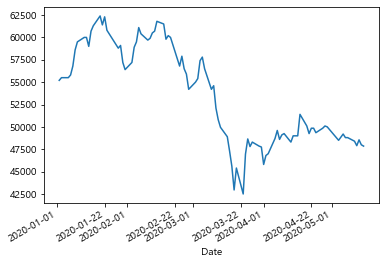

In [44]:
df['Close'].plot()

1990년부터 달러-원 환율 정보를 가져와 종가를 기준으로 matplotlib에서 시각화를 진행합니다.

In [45]:
usd_to_krw = fdr.DataReader('USD/KRW', '1990-01-01', '2020-05-15')
usd_to_krw.head()

,Close,Open,High,Low,Change
Date,,,,,
1990-01-03,683.5,683.5,683.5,683.5,0.0031
1990-01-04,684.2,684.2,684.2,684.2,0.0010
1990-01-05,683.7,683.7,683.7,683.7,-0.0007
1990-01-08,683.6,683.6,683.6,683.6,-0.0001
1990-01-09,684.0,684.0,684.0,684.0,0.0006


[Text(0, 0.5, 'KRW'),
 Text(0.5, 0, 'Year'),
 Text(0.5, 1.0, 'USD/KRW exchange rate')]

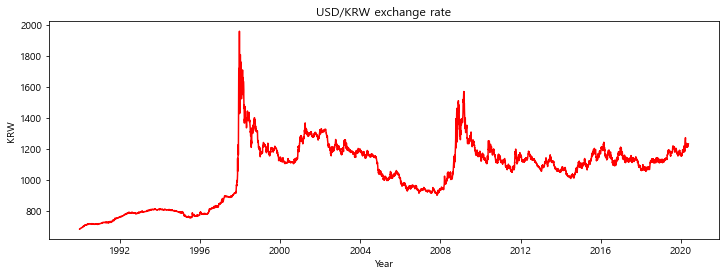

In [46]:
fig, ax = plt.subplots(figsize = (12, 4))

ax.plot(usd_to_krw['Close'], 
        color = 'red')

ax.set(title = 'USD/KRW exchange rate', 
       xlabel = 'Year',
      ylabel = 'KRW')

x축의 눈금에 매 연도가 빠지지 않고 표시되었으면 합니다. matplotlib에서 날짜를 다루는 모듈은 dates이며, 이를 mdates로 받아와서 x축의 눈금을 조절합니다.

axes.xaxis.set_major_locator는 x축의 큰 눈금을, axes.xaxis.set_major_formatter는 큰 눈금의 표시 형식(format)을 나타냅니다. mdates.YearLocator()로 연도를 기준으로 표시하고, mdates.DateFormatter로 연도의 포맷을 나타냅니다.

https://matplotlib.org/3.2.1/api/dates_api.html

In [47]:
import matplotlib.dates as mdates

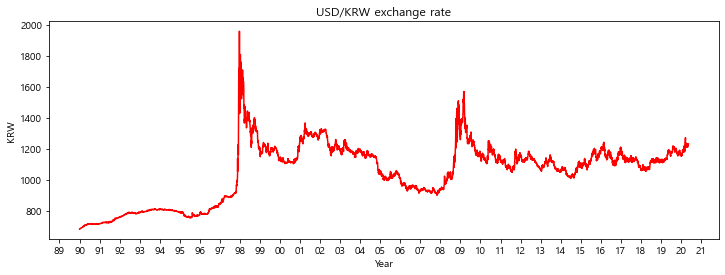

In [48]:
fig, ax = plt.subplots(figsize = (12, 4))

ax.plot(usd_to_krw['Close'], 
        color = 'red')

ax.set(title = 'USD/KRW exchange rate', 
       xlabel = 'Year',
      ylabel = 'KRW')

ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%y'))
#ax.tick_params('x', labelrotation = 45)

<p style="color:#0000FF";><font size = "5"><b>
 # 연습하기
    </b></font></p>
    
- 2020년 1월 1일부터 2020년 5월 15일까지 다음 환율의 종가를 뽑아 matplotlib로 그리세요.
    - USD/KRW, EUR/KRW, GBP/KRW
- x축은 1달 단위로 표시하되(mdates.MonthLocator()), 2020-01-01 식으로 매 월의 1일을 표시하세요.
- 각 데이터를 구분하는 범례를 만드세요.

### DataFrame에서의 datetime: pd.to_datetine
DataFrame에서 문자열 형식의 열을 datetime 열로 바꾸려면 to_datetime을 사용합니다. 중간고사 과제에서 사용한 영화 데이터를 활용합니다.

In [49]:
url_movie = "https://raw.githubusercontent.com/eunyu1031/Media_interface_2020Spr/master/data/midterm_vis.csv"

movie = pd.read_csv(url_movie, encoding = 'utf-8')
movie.info()
movie.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 529 entries, 0 to 528
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   영화코드    529 non-null    int64 
 1   영화명     529 non-null    object
 2   개봉연월일   529 non-null    object
 3   매출액     529 non-null    int64 
 4   관객수     529 non-null    int64 
 5   스크린수    529 non-null    int64 
 6   상영횟수    529 non-null    int64 
 7   개봉연도    529 non-null    int64 
 8   개봉월     529 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 37.3+ KB


,영화코드,영화명,개봉연월일,매출액,관객수,스크린수,상영횟수,개봉연도,개봉월
0,20090834,아바타,2009-12-17,81455728000,8151952,714,111860,2009,12
1,20100214,아저씨,2010-08-04,47101332000,6178248,501,109853,2010,8
2,20100312,인셉션,2010-07-21,44309381800,5937741,772,89880,2010,7
3,20090904,의형제,2010-02-04,40153729000,5416812,569,118243,2010,2
4,20090933,아이언맨 2,2010-04-29,32635195500,4425003,921,87665,2010,4


format을 설정하지 않아도 잘 읽어오기는 하나, 설정해 주는 편이 안전합니다.

In [ ]:
help(pd.to_datetime)

In [50]:
pd.to_datetime(movie['개봉연월일'])

0     2009-12-17
1     2010-08-04
2     2010-07-21
3     2010-02-04
4     2010-04-29
         ...    
524   2020-04-30
525   2020-04-29
526   2018-10-09
527   2020-04-15
528   2019-10-30
Name: 개봉연월일, Length: 529, dtype: datetime64[ns]

In [51]:
pd.to_datetime(movie['개봉연월일'], format = '%Y-%m-%d')

0     2009-12-17
1     2010-08-04
2     2010-07-21
3     2010-02-04
4     2010-04-29
         ...    
524   2020-04-30
525   2020-04-29
526   2018-10-09
527   2020-04-15
528   2019-10-30
Name: 개봉연월일, Length: 529, dtype: datetime64[ns]

In [52]:
movie['개봉연월일'] = pd.to_datetime(movie['개봉연월일'], format = '%Y-%m-%d')

개봉연월일 정보에서 요일을 구해봅시다. Series.dt.day_name()을 사용하면 요일의 이름까지 리턴합니다.

In [53]:
movie['개봉연월일'].dt.day_name()

0       Thursday
1      Wednesday
2      Wednesday
3       Thursday
4       Thursday
         ...    
524     Thursday
525    Wednesday
526      Tuesday
527    Wednesday
528    Wednesday
Name: 개봉연월일, Length: 529, dtype: object

In [54]:
movie['요일'] = movie['개봉연월일'].dt.day_name()

## 질문: 관계 (relationship)

산점도(scatterplot)와 버블 차트(bubble chart)를 살펴볼 예정입니다. 모두 상관관계이며 인과를 얘기할 수 없다는 점을 유의하시기 바랍니다.

임의의 숫자를 가지고 있는 열을 만들어서 상관관계가 약한 경우의 산점도를 먼저 그려볼 예정입니다.

In [55]:
movie['random'] = np.random.randint(50,4000, size=(529, 1))
movie.describe()

,영화코드,매출액,관객수,스크린수,상영횟수,개봉연도,개봉월,random
count,5.290000e+02,5.290000e+02,5.290000e+02,529.000000,529.000000,529.000000,529.000000,529.000000
mean,2.014606e+07,2.463244e+10,3.090776e+06,900.982987,70174.156900,2014.856333,6.482042,2102.311909
std,3.395993e+04,2.221492e+10,2.755639e+06,480.654346,45078.059472,3.153005,3.582914,1123.202080
min,1.982002e+07,1.778460e+08,3.330700e+04,47.000000,2006.000000,2004.000000,1.000000,56.000000
25%,2.012405e+07,1.085620e+10,1.373316e+06,562.000000,41275.000000,2012.000000,3.000000,1212.000000
50%,2.014767e+07,1.748721e+10,2.192525e+06,811.000000,57578.000000,2015.000000,7.000000,2116.000000
75%,2.017406e+07,3.022270e+10,3.784602e+06,1114.000000,89024.000000,2018.000000,10.000000,3106.000000
max,2.020772e+07,1.396518e+11,1.761368e+07,3556.000000,299334.000000,2020.000000,12.000000,3992.000000


ax.scatter(x축, y축)이 기본형입니다. 선 차트와 마찬가지로 marker를 설정할 수 있으며, 각 marker가 겹치는 경우를 알아볼 수 있도록 투명도를 조절했습니다. 매개변수 alpha는 0(투명)부터 1(불투명)까지의 값을 가집니다.

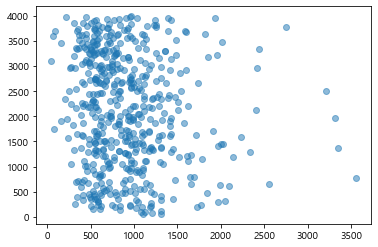

In [56]:
fig, ax = plt.subplots()

ax.scatter(movie['스크린수'], movie['random'], marker = 'o', alpha = 0.5)
plt.show()

<p style="color:#0000FF";><font size = "5"><b>
 # 연습하기
    </b></font></p>
    
- 관객수와 매출액 간 상관관계를 산점도로 확인하세요.

Seaborn의 scatterplot에서는 산점도에서 marker의 색깔과 모양, 크기를 조절하여 x변수와 y변수 외에 다른 변수의 정보까지 나타낼 수 있습니다.

https://seaborn.pydata.org/generated/seaborn.scatterplot.html

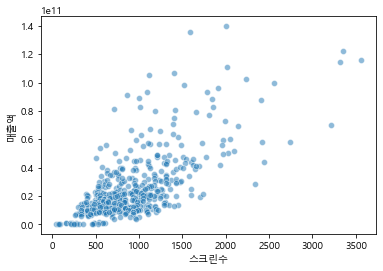

In [57]:
fig, ax = plt.subplots()

sns.scatterplot(x = '스크린수', 
                y = '매출액', 
                data = movie, 
                alpha = 0.5,
                ax = ax)
plt.show()

Seaborn의 다른 그래프에서 보았다시피 범주형 변수의 정보를 산점도 내 marker의 색상(hue)과 모양(style)으로 나타낼 수 있습니다. 요일 정보를 추가해서 살펴봅시다.

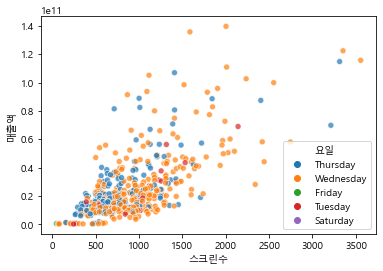

In [58]:
fig, ax = plt.subplots()

sns.scatterplot(x = '스크린수', 
                y = '매출액', 
                hue = '요일', 
                data = movie,
                alpha = 0.7,
                ax = ax)
plt.show()

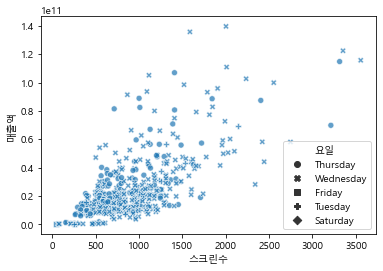

In [59]:
fig, ax = plt.subplots()

sns.scatterplot(x = '스크린수', 
                y = '매출액', 
                style = '요일',
                data = movie,
                alpha = 0.7,
                ax = ax)
plt.show()

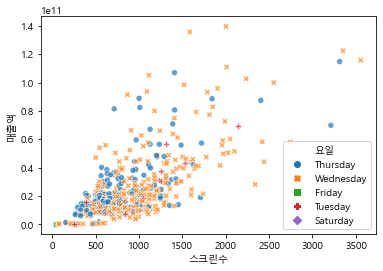

In [60]:
fig, ax = plt.subplots()

sns.scatterplot(x = '스크린수', 
                y = '매출액', 
                hue = '요일',
                style = '요일',
                data = movie,
                alpha = 0.7,
                ax = ax)
plt.show()

### 하나의 열을 기반으로 다른 열 만들기
여러 방법이 있지만 우선 두 가지를 소개합니다. 1~12월을 봄/여름/가을/겨울로 나누는 예제를 사용합니다.
- 숫자형 변수: pd.cut
- 범주형 변수: DataFrame.map

pd.cut은 숫자형 변수에서 범위를 정해서 각 범위에 unique label을 할당합니다. 

매개변수 right는 lower/upper bound의 숫자를 포함할지 포함하지 않을지를 지정합니다. 매개변수 bins가 [1, 2, 3, 4]일 때, right = True(default)인 경우 (1, 2], (2, 3], (3, 4]로 나누고, right = False인 경우 [1, 2), [3, 4), [5, 6)으로 나눕니다. 

매개변수 labels는 나뉜 구간마다 붙일 이름을 정합니다. bins에 인수로 넘긴 리스트보다 아이템 하나가 적어야 합니다.

아래 코드는 3이상 6미만은 봄, 6이상 9 미만은 여름, 9이상 11미만은 가을, 11이상 13미만은 겨울로 지정합니다. 다만 라벨은 서로 같지 않아야 하기 때문에 1, 2월은 우선 따로 할당하지 않고 NaN으로 남겨두고, NaN을 정해진 값으로 바꾸는 fillna 함수를 사용해서 바꾸었습니다.

In [61]:
pd.cut(movie['개봉월'], 
       bins = [3, 6, 9, 11, 13], 
       labels = ['봄', '여름', '가을', '겨울'],
       right = False)

0       겨울
1       여름
2       여름
3      NaN
4        봄
      ... 
524      봄
525      봄
526     가을
527      봄
528     가을
Name: 개봉월, Length: 529, dtype: category
Categories (4, object): [봄 < 여름 < 가을 < 겨울]

In [62]:
movie['계절1'] = pd.cut(movie['개봉월'], 
                     bins = [3, 6, 9, 11, 13], 
                     labels = ['봄', '여름', '가을', '겨울'],
                     right = False)

In [63]:
movie['계절1'].fillna('겨울')

0      겨울
1      여름
2      여름
3      겨울
4       봄
       ..
524     봄
525     봄
526    가을
527     봄
528    가을
Name: 계절1, Length: 529, dtype: category
Categories (4, object): [봄 < 여름 < 가을 < 겨울]

In [64]:
movie['계절1'] = movie['계절1'].fillna('겨울')
movie.head()

,영화코드,영화명,개봉연월일,매출액,관객수,스크린수,상영횟수,개봉연도,개봉월,요일,random,계절1
0,20090834,아바타,2009-12-17,81455728000,8151952,714,111860,2009,12,Thursday,3828,겨울
1,20100214,아저씨,2010-08-04,47101332000,6178248,501,109853,2010,8,Wednesday,3131,여름
2,20100312,인셉션,2010-07-21,44309381800,5937741,772,89880,2010,7,Wednesday,2612,여름
3,20090904,의형제,2010-02-04,40153729000,5416812,569,118243,2010,2,Thursday,3525,겨울
4,20090933,아이언맨 2,2010-04-29,32635195500,4425003,921,87665,2010,4,Thursday,3718,봄


DataFrame.map은 바꾸기 전의 값 하나에 바꾸고자 하는 값을 딕셔너리로 매핑하여 나타냅니다. 딕셔너리 변수 season_map을 만들어 사용했습니다.

In [65]:
season_map = {1:'겨울', 2:'겨울', 
              3:'봄', 4:'봄', 5:'봄', 
              6:'여름', 7:'여름', 8:'여름', 
              9:'가을', 10:'가을', 11:'겨울', 12:'겨울',}

movie['개봉월'].map(season_map)

0      겨울
1      여름
2      여름
3      겨울
4       봄
       ..
524     봄
525     봄
526    가을
527     봄
528    가을
Name: 개봉월, Length: 529, dtype: object

In [66]:
movie['계절2'] = movie['개봉월'].map(season_map)
movie.head()

,영화코드,영화명,개봉연월일,매출액,관객수,스크린수,상영횟수,개봉연도,개봉월,요일,random,계절1,계절2
0,20090834,아바타,2009-12-17,81455728000,8151952,714,111860,2009,12,Thursday,3828,겨울,겨울
1,20100214,아저씨,2010-08-04,47101332000,6178248,501,109853,2010,8,Wednesday,3131,여름,여름
2,20100312,인셉션,2010-07-21,44309381800,5937741,772,89880,2010,7,Wednesday,2612,여름,여름
3,20090904,의형제,2010-02-04,40153729000,5416812,569,118243,2010,2,Thursday,3525,겨울,겨울
4,20090933,아이언맨 2,2010-04-29,32635195500,4425003,921,87665,2010,4,Thursday,3718,봄,봄


<p style="color:#0000FF";><font size = "5"><b>
 # 연습하기
    </b></font></p>
    
- 스크린수와 매출액 간 상관관계를 산점도로 나타내고, 요일은 색깔로, 계절은 marker의 모양으로 구분해 보세요.

In [ ]:
fig, ax = plt.subplots()



ax.legend(bbox_to_anchor=(1, 1), loc = 'upper left')
plt.show()

범례(legend)에서 bbox_to_anchor와 loc을 같이 사용할 경우, loc의 기능은 단독으로 사용했을 때와 다릅니다. 매개변수 bbox_to_anchor는 figure 자체에서 기준을 잡는데, 아래 그림의 푸른 글씨가 bbox_to_anchor의 표시입니다. figure로 그려지는 공간에서 (0, 0)이 가장 왼쪽 아래, (1, 1)이 오른쪽 위입니다. 

매개변수 bbox_to_anchor와 loc을 같이 사용하는 경우, loc은 범례 박스의 네 귀퉁이(upper&lower)/네 변의 중심점(center)을 나타냅니다. 먼저 bbox_to_anchor로 figure에 기준이 되는 좌표를 지정한 후, 해당 좌표에 범례 박스가 접하는 부분을 loc에 명시합니다.

<img src='https://i.stack.imgur.com/OIMyM.png'/>
참고 1) 

https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot 

참고 2) 

https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.legend.html#matplotlib.pyplot.legend

버블 차트(bubble chart)는 marker의 매개변수 size에 기준이 될 열을 지정하면 됩니다. 범주형과 연속형 둘 다 가능하지만, 연속형의 경우 marker 크기의 최소/최대값을 sizes에 튜플(tuple)로 넣어줄 수 있습니다.

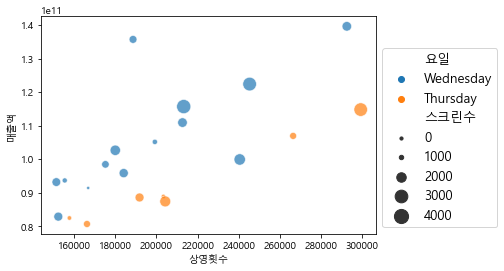

In [67]:
fig, ax = plt.subplots()

sns.scatterplot(x = '상영횟수', 
                y = '매출액', 
                hue = '요일',
                data = movie[movie['관객수']>10000000],
                size = '스크린수', 
                sizes = (10, 200),
                alpha = 0.7,
                ax = ax)

ax.legend(bbox_to_anchor=(1, 0), loc = 'lower left', prop={'size': 13})

plt.show()

#### 참고
'택시운전사'의 상영 기록입니다. 궁금하다면 참고하세요

In [68]:
daily_url = "https://github.com/eunyu1031/Media_interface_2020Spr/blob/master/data/%ED%83%9D%EC%8B%9C%EC%9A%B4%EC%A0%84%EC%82%AC_KOBIS_%EC%9D%BC%EC%9E%90%EB%B3%84_%ED%86%B5%EA%B3%84%EC%A0%95%EB%B3%B4_2020-05-18.xlsx?raw=true"
taxi_driver = pd.read_excel(daily_url, encoding = 'cp949', skiprows = [0, 1, 2])
taxi_driver.head()

,날짜,스크린수,스크린점유율,상영횟수,상영점유율,좌석수,좌석점유율,좌석판매율,매출액,매출액증감(전일대비),관객수,관객수증감(전일대비),누적매출액,누적관객수,순위
0,2017-07-03,1,0.000,1,0.000,182,0.000,1.000,1602000,1602000 ( 100.0% ),182,182 ( 100.0% ),1602000,182,27
1,2017-07-10,8,0.002,12,0.001,4036,0.002,1.000,25236000,25236000 ( 100.0% ),4036,4036 ( 100.0% ),26838000,4218,5
2,2017-07-11,83,0.018,89,0.006,17664,0.007,0.962,102167000,76931000 ( 304.8% ),16990,12954 ( 321.0% ),129005000,21208,3
3,2017-07-12,23,0.005,23,0.001,4629,0.002,1.034,28710000,-73457000 ( -71.9% ),4785,-12205 ( -71.8% ),157715000,25993,8
4,2017-07-13,19,0.004,19,0.001,3719,0.001,0.971,21990000,-6720000 ( -23.4% ),3613,-1172 ( -24.5% ),179705000,29606,10
